<h2>Set de Datos: Fashion MNIST: 60000 imágenes de entrenamiento y 10000 imágenes de prueba  en 10 categorìas</h2>

<img src="fashion-mnist-sprite.png">

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.1.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

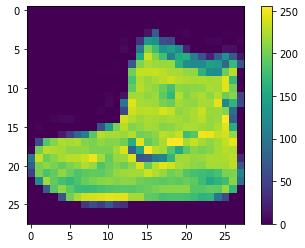

In [14]:
#Distribución de pixeles (0 - 255)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#Procesamiento de imagenes para obtener valores de 0 - 1
train_images = train_images / 255.0

test_images = test_images / 255.0

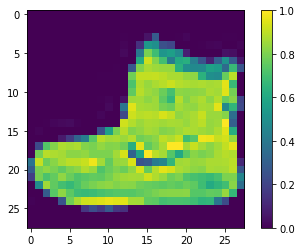

In [15]:
#Distribución de pixeles (0 - 1)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

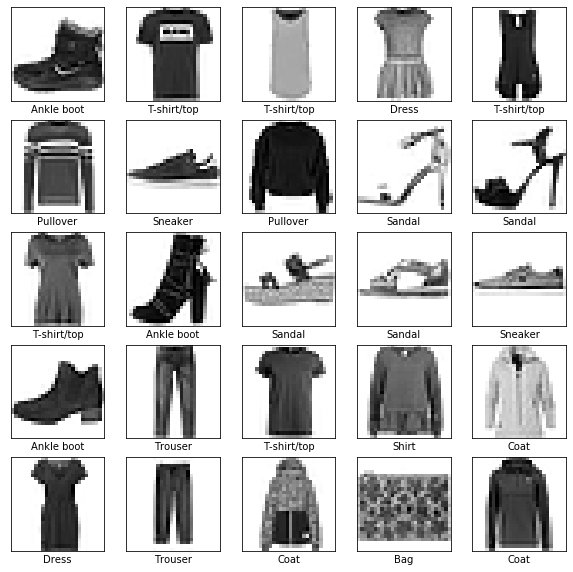

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
#construccion básico de red neuronal(Modelo secuencial)
#Utilizacion de una capa plana 
#Y dos capas densas (la primera capa tiene 128 nodos o neuronas y la segunda capa tiene 10 nodos - 10 clases de tipo de ropa)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
#Configuraciones previas para compilar (OPTIMIZADORES)
model.compile(optimizer='adam',  #Clasificaciòn correcta
             loss='sparse_categorical_crossentropy', #Escasa de entropia(medida de insertidumbre) categorica
             metrics=['accuracy']) #exactitud              

In [19]:
#Alimentar con los datos de entrenamiento al modelo
#Metodo phred
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4995 - acc: 0.8267
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3779 - acc: 0.8641
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3384 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3134 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2943 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2788 - acc: 0.8973
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2670 - acc: 0.9004
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2570 - acc: 0.9041
Epoch 9/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2452 - acc: 0.9083
Epoch 10/10
60000/60000 [==============================] - 3s 52us/sample - loss: 

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3525 - acc: 0.8758
Test accuracy:  0.8758


In [21]:
predictions = model.predict(test_images)

In [23]:
predictions[0] #La matriz describe la confianza del modelo de que la imagen corresponde a las 10 prendas diferentes

array([6.1219612e-07, 1.1549183e-08, 5.1561791e-08, 6.2819282e-08,
       9.7461771e-07, 9.4924431e-04, 3.1386721e-06, 3.7805796e-02,
       4.5834756e-07, 9.6123970e-01], dtype=float32)

In [24]:
#Etiqueta con el mayor valor de confianza
np.argmax(predictions[0])

9

In [25]:
#Etiqueta de prueba
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")    
    plt.ylim([0, 1])    
    predicted_label = np.argmax(predictions_array)   
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

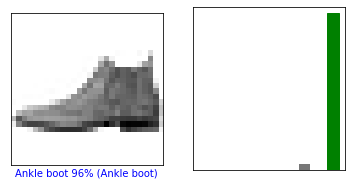

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

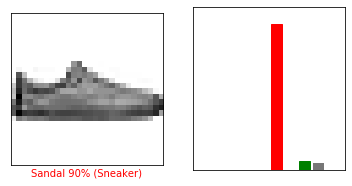

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

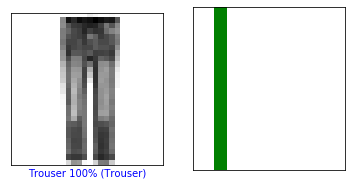

In [29]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

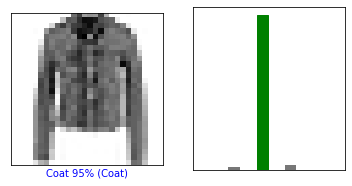

In [30]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

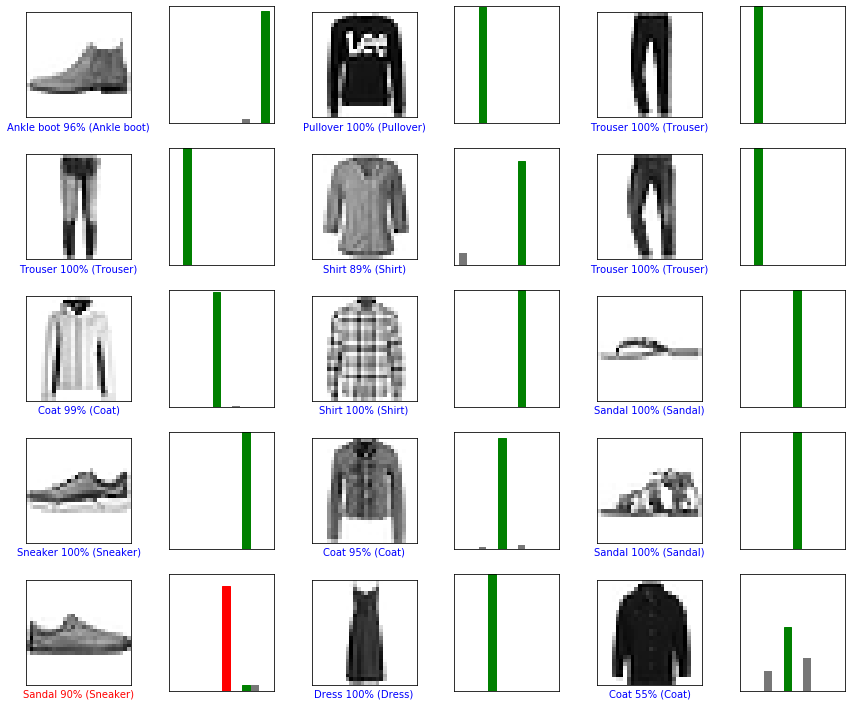

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

In [32]:
img = test_images[0]

print(img.shape)

(28, 28)


In [33]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.1219555e-07 1.1549161e-08 5.1561887e-08 6.2819161e-08 9.7461771e-07
  9.4924337e-04 3.1386751e-06 3.7805784e-02 4.5834713e-07 9.6123970e-01]]


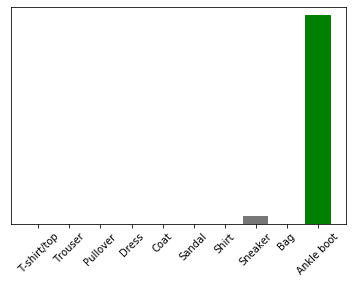

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

9